In [1]:
import pandas as pd
from sklearn.utils import shuffle

# Loading Data

## pandas.read_csv

In [2]:
file_path = "../../data/raw/"

X = pd.read_csv(f"{file_path}x_train_gr_smpl.csv", delimiter=',')
X.head()

,0,1,2,3,4,5,6,7,8,9,...,2294,2295,2296,2297,2298,2299,2300,2301,2302,2303
0,30.0,29.0,28.0,29.0,31.0,30.0,29.0,28.0,27.0,26.0,...,31.0,32.0,35.0,38.0,39.0,39.0,40.0,39.0,39.0,38.0
1,31.0,31.0,33.0,32.0,31.0,30.0,29.0,28.0,28.0,28.0,...,32.0,34.0,35.0,36.0,36.0,37.0,38.0,38.0,37.0,37.0
2,30.0,30.0,31.0,29.0,28.0,27.0,26.0,28.0,30.0,31.0,...,33.0,35.0,37.0,37.0,38.0,39.0,38.0,38.0,39.0,40.0
3,26.0,25.0,24.0,24.0,24.0,27.0,28.0,29.0,29.0,30.0,...,32.0,34.0,36.0,37.0,38.0,42.0,40.0,37.0,36.0,36.0
4,25.0,26.0,28.0,28.0,28.0,28.0,28.0,27.0,26.0,25.0,...,30.0,31.0,33.0,37.0,38.0,37.0,36.0,36.0,35.0,35.0


In [3]:
Y = pd.read_csv(f"{file_path}y_train_smpl.csv", delimiter=',')
Y.columns = ['target']

y0 = pd.read_csv(f"{file_path}y_train_smpl_0.csv", delimiter=',')
y0.columns = ['target']

y1 = pd.read_csv(f"{file_path}y_train_smpl_1.csv", delimiter=',')
y1.columns = ['target']

y2 = pd.read_csv(f"{file_path}y_train_smpl_2.csv", delimiter=',')
y2.columns = ['target']

y3 = pd.read_csv(f"{file_path}y_train_smpl_3.csv", delimiter=',')
y3.columns = ['target']

y4 = pd.read_csv(f"{file_path}y_train_smpl_4.csv", delimiter=',')
y4.columns = ['target']

y5 = pd.read_csv(f"{file_path}y_train_smpl_5.csv", delimiter=',')
y5.columns = ['target']

y6 = pd.read_csv(f"{file_path}y_train_smpl_6.csv", delimiter=',')
y6.columns = ['target']

y7 = pd.read_csv(f"{file_path}y_train_smpl_7.csv", delimiter=',')
y7.columns = ['target']

y8 = pd.read_csv(f"{file_path}y_train_smpl_8.csv", delimiter=',')
y8.columns = ['target']

y9 = pd.read_csv(f"{file_path}y_train_smpl_9.csv", delimiter=',')
y9.columns = ['target']

Y.tail()

,target
12655,9
12656,9
12657,9
12658,9
12659,9


# Create datasets

In [4]:
train_smpl_0 = pd.concat([X, y0], axis=1)
train_smpl_1 = pd.concat([X, y1], axis=1)
train_smpl_2 = pd.concat([X, y2], axis=1)
train_smpl_3 = pd.concat([X, y3], axis=1)
train_smpl_4 = pd.concat([X, y4], axis=1)
train_smpl_5 = pd.concat([X, y5], axis=1)
train_smpl_6 = pd.concat([X, y6], axis=1)
train_smpl_7 = pd.concat([X, y7], axis=1)
train_smpl_8 = pd.concat([X, y8], axis=1)
train_smpl_9 = pd.concat([X, y9], axis=1)

In [5]:
train_smpl = pd.concat([X, Y], axis=1)
train_smpl.head()

,0,1,2,3,4,5,6,7,8,9,...,2295,2296,2297,2298,2299,2300,2301,2302,2303,target
0,30.0,29.0,28.0,29.0,31.0,30.0,29.0,28.0,27.0,26.0,...,32.0,35.0,38.0,39.0,39.0,40.0,39.0,39.0,38.0,0
1,31.0,31.0,33.0,32.0,31.0,30.0,29.0,28.0,28.0,28.0,...,34.0,35.0,36.0,36.0,37.0,38.0,38.0,37.0,37.0,0
2,30.0,30.0,31.0,29.0,28.0,27.0,26.0,28.0,30.0,31.0,...,35.0,37.0,37.0,38.0,39.0,38.0,38.0,39.0,40.0,0
3,26.0,25.0,24.0,24.0,24.0,27.0,28.0,29.0,29.0,30.0,...,34.0,36.0,37.0,38.0,42.0,40.0,37.0,36.0,36.0,0
4,25.0,26.0,28.0,28.0,28.0,28.0,28.0,27.0,26.0,25.0,...,31.0,33.0,37.0,38.0,37.0,36.0,36.0,35.0,35.0,0


# class distribution

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc612132b38>]],
      dtype=object)

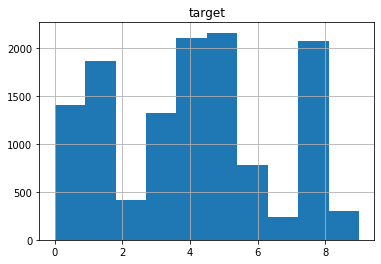

In [6]:
%matplotlib inline
train_smpl.hist(column='target')

In [7]:
train_smpl.target.value_counts()

5    2160
4    2100
8    2070
1    1860
0    1410
3    1320
6     780
2     420
9     300
7     240
Name: target, dtype: int64

# Data Randomisation

## sklear.utils.suffle

In [8]:
train_smpl = shuffle(train_smpl, random_state=42)
train_smpl_0 = shuffle(train_smpl_0, random_state=42)
train_smpl_1 = shuffle(train_smpl_1, random_state=42)
train_smpl_2 = shuffle(train_smpl_2, random_state=42)
train_smpl_3 = shuffle(train_smpl_3, random_state=42)
train_smpl_4 = shuffle(train_smpl_4, random_state=42)
train_smpl_5 = shuffle(train_smpl_5, random_state=42)
train_smpl_6 = shuffle(train_smpl_6, random_state=42)
train_smpl_7 = shuffle(train_smpl_7, random_state=42)
train_smpl_8 = shuffle(train_smpl_8, random_state=42)
train_smpl_9 = shuffle(train_smpl_9, random_state=42)
train_smpl.head()

,0,1,2,3,4,5,6,7,8,9,...,2295,2296,2297,2298,2299,2300,2301,2302,2303,target
1236,25.0,24.0,28.0,27.0,24.0,22.0,22.0,22.0,21.0,21.0,...,34.0,33.0,34.0,36.0,35.0,35.0,34.0,34.0,35.0,0
8847,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,241.0,230.0,237.0,227.0,241.0,241.0,239.0,241.0,237.0,5
11285,34.0,34.0,34.0,33.0,32.0,31.0,31.0,30.0,30.0,30.0,...,16.0,14.0,12.0,11.0,11.0,11.0,13.0,17.0,19.0,8
12423,63.0,66.0,70.0,81.0,77.0,72.0,62.0,61.0,60.0,62.0,...,123.0,77.0,47.0,44.0,43.0,42.0,55.0,71.0,68.0,9
10020,38.0,39.0,40.0,50.0,61.0,72.0,93.0,138.0,185.0,233.0,...,62.0,68.0,68.0,81.0,98.0,86.0,73.0,68.0,65.0,6


In [9]:
train_smpl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12660 entries, 1236 to 7270
Columns: 2305 entries, 0 to target
dtypes: float64(2304), int64(1)
memory usage: 222.7 MB


In [10]:
train_smpl.describe()

,0,1,2,3,4,5,6,7,8,9,...,2295,2296,2297,2298,2299,2300,2301,2302,2303,target
count,12660.000000,12660.000000,12660.000000,12660.000000,12660.000000,12660.000000,12660.000000,12660.000000,12660.000000,12660.000000,...,12660.000000,12660.000000,12660.000000,12660.000000,12660.000000,12660.000000,12660.000000,12660.000000,12660.000000,12660.000000
mean,90.275908,90.296840,90.331043,90.369510,90.608847,90.852370,91.113033,91.427488,91.566588,91.775355,...,71.547393,71.399368,70.980253,70.064455,69.243681,68.339336,67.716983,67.734992,67.784123,4.066351
std,79.531811,79.674242,79.816240,79.896452,79.958141,80.082173,80.266651,80.406439,80.439131,80.457116,...,65.317373,65.485237,65.649521,65.109495,64.328815,63.312147,62.688005,62.951496,63.289188,2.670880
min,5.000000,6.000000,5.000000,6.000000,6.000000,6.000000,6.000000,6.000000,5.000000,6.000000,...,6.000000,6.000000,6.000000,5.000000,6.000000,6.000000,6.000000,6.000000,5.000000,0.000000
25%,29.000000,29.000000,29.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,29.000000,...,25.000000,25.000000,25.000000,25.000000,24.000000,24.000000,24.000000,24.000000,24.000000,1.000000
50%,55.000000,56.000000,55.000000,55.000000,56.000000,56.000000,56.000000,56.000000,57.000000,57.000000,...,47.000000,47.000000,46.000000,45.000000,44.000000,44.000000,44.000000,43.000000,43.000000,4.000000
75%,136.000000,136.000000,135.000000,136.000000,137.000000,137.000000,140.000000,140.000000,140.000000,140.000000,...,93.000000,93.000000,92.000000,91.000000,90.000000,88.000000,87.000000,86.000000,87.000000,6.000000
max,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,9.000000


# Reducing the size

# Features/Attributes Selection

## correlation matrix

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

#plt.matshow(train_smpl.corr())
#plt.show()

In [12]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
print(train_smpl.shape)

best_20 = SelectKBest(chi2, k=20).fit_transform(train_smpl[train_smpl.columns[:2303]], train_smpl['target'])
best_20 = pd.DataFrame(best_20)
train_smpl_20 = pd.concat([best_20, train_smpl['target']], axis=1)
print(train_smpl_20.shape)

best_50 = SelectKBest(chi2, k=50).fit_transform(train_smpl[train_smpl.columns[:2303]], train_smpl['target'])
best_50 = pd.DataFrame(best_50)
train_smpl_50 = pd.concat([best_50, train_smpl['target']], axis=1)
print(train_smpl_50.shape)

best_100 = SelectKBest(chi2, k=100).fit_transform(train_smpl[train_smpl.columns[:2303]], train_smpl['target'])
best_100 = pd.DataFrame(best_100)
train_smpl_100 = pd.concat([best_100, train_smpl['target']], axis=1)
print(train_smpl_100.shape)

(12660, 2305)
(12660, 21)
(12660, 51)
(12660, 101)


# Test Train Split

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_smpl[train_smpl.columns[:2303]], train_smpl['target'], test_size=0.33, random_state=42)

X_train_20, X_test_20, y_train_20, y_test_20 = train_test_split(train_smpl_20[train_smpl_20.columns[:20]], train_smpl_20['target'], test_size=0.33, random_state=42)
X_train_50, X_test_50, y_train_50, y_test_50 = train_test_split(train_smpl_50[train_smpl_50.columns[:50]], train_smpl_50['target'], test_size=0.33, random_state=42)
X_train_100, X_test_100, y_train_100, y_test_100 = train_test_split(train_smpl_100[train_smpl_100.columns[:100]], train_smpl_100['target'], test_size=0.33, random_state=42)


X_train_0, X_test_0, y_train_0, y_test_0 = train_test_split(train_smpl_0[train_smpl_0.columns[:2303]], train_smpl_0['target'], test_size=0.33, random_state=42)
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(train_smpl_1[train_smpl_1.columns[:2303]], train_smpl_1['target'], test_size=0.33, random_state=42)
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(train_smpl_2[train_smpl_2.columns[:2303]], train_smpl_2['target'], test_size=0.33, random_state=42)
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(train_smpl_3[train_smpl_3.columns[:2303]], train_smpl_3['target'], test_size=0.33, random_state=42)
X_train_4, X_test_4, y_train_4, y_test_4 = train_test_split(train_smpl_4[train_smpl_4.columns[:2303]], train_smpl_4['target'], test_size=0.33, random_state=42)
X_train_5, X_test_5, y_train_5, y_test_5 = train_test_split(train_smpl_5[train_smpl_5.columns[:2303]], train_smpl_5['target'], test_size=0.33, random_state=42)
X_train_6, X_test_6, y_train_6, y_test_6 = train_test_split(train_smpl_6[train_smpl_6.columns[:2303]], train_smpl_6['target'], test_size=0.33, random_state=42)
X_train_7, X_test_7, y_train_7, y_test_7 = train_test_split(train_smpl_7[train_smpl_7.columns[:2303]], train_smpl_7['target'], test_size=0.33, random_state=42)
X_train_8, X_test_8, y_train_8, y_test_8 = train_test_split(train_smpl_8[train_smpl_8.columns[:2303]], train_smpl_8['target'], test_size=0.33, random_state=42)
X_train_9, X_test_9, y_train_9, y_test_9 = train_test_split(train_smpl_9[train_smpl_9.columns[:2303]], train_smpl_9['target'], test_size=0.33, random_state=42)

X_train_10classes = [X_train_0, X_train_1, X_train_2, X_train_3, X_train_4, X_train_5, X_train_6, X_train_7, X_train_8, X_train_9]
X_test_10classes = [X_test_0, X_test_1, X_test_2, X_test_3, X_test_4, X_test_5, X_test_6, X_test_7, X_test_8, X_test_9]
y_train_10classes = [y_train_0, y_train_1, y_train_2, y_train_3, y_train_4, y_train_5, y_train_6, y_train_7, y_train_8, y_train_9]
y_test_10classes = [y_test_0, y_test_1, y_test_2, y_test_3, y_test_4, y_test_5, y_test_6, y_test_7, y_test_8, y_test_9]

# Modeling

## Multinomial Naive Bayes model (multi-class classifier)

### Before Features/Attributes Selection

In [14]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.4595500239348971

In [15]:
from sklearn.metrics import confusion_matrix

y_pred = clf.predict(X_test)
conf_mat = confusion_matrix(y_test, y_pred)

array([[168,  47,   4,   0,  44,  34,  11, 102,  35,  28],
       [169,  78,  44,   1,  31,   3,   1, 123,  38, 120],
       [ 10,  12,  87,   0,   1,   0,   0,  12,   8,   0],
       [ 49,   6,  11, 260,  15,   0,   0,  16,  36,  53],
       [ 54,  22,  39,  17, 199,   0,  12, 215, 101,  19],
       [ 62,  11,   5,   1,  12, 446,  57,  61,  50,  19],
       [ 31,   0,   0,   1,   0,   0, 171,   8,  17,  28],
       [ 14,   6,   4,   0,   3,   0,   0,  48,   0,   0],
       [ 83,  12,  30,   0,  12,   4,  51,  77, 392,  31],
       [  1,  11,   0,   0,   0,   1,   7,   2,   3,  71]])

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import itertools

def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

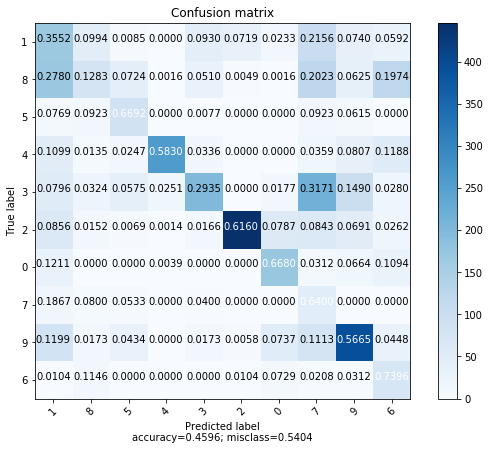

In [17]:
plot_confusion_matrix(conf_mat, target_names=y_test.unique())

### After Features/Attributes Selection (20/50/100)

In [18]:
X_trains_reduced = [  X_train_20, X_train_50, X_train_100]
X_tests_reduced = [ X_test_20, X_test_50, X_test_100]
y_trains_reduced = [ y_train_20, y_train_50, y_train_100]
y_tests_reduced = [ y_test_20, y_test_50, y_test_100]

for X_trains, X_tests, y_trains, y_tests in zip(X_trains_reduced, X_tests_reduced, y_trains_reduced, y_tests_reduced):    
    clf = MultinomialNB()
    clf.fit(X_trains, y_trains)
    print(clf.score(X_tests, y_tests))

0.12805169937769267
0.0861656294877932
0.07012924844423168


## Gaussian Naive Bayes model (mono-class classifier)

In [19]:
from sklearn.naive_bayes import GaussianNB
scores = []
for X_train, X_test, y_train, y_test in zip(X_train_10classes, X_test_10classes, y_train_10classes, y_test_10classes):    
    clf = GaussianNB()
    clf.fit(X_train, y_train)
    scores.append(clf.score(X_test, y_test))
    print(clf.score(X_test, y_test))
print("mean: ", sum(scores)/len(scores))

0.5694112015318334
0.5639061752034467
0.6737673528003829
0.839157491622786
0.7280995691718526
0.709191000478698
0.86668262326472
0.507898516036381
0.8128291048348492
0.6685016754427956
mean:  0.6939444710387745
